In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

In [153]:
df= pd.read_excel('flight.xlsm')

In [154]:
df.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134,0,0,679
1,1,12,830,DL,90,0,0,214
2,1,1,1835,UA,213,0,0,1605
3,1,4,1730,AA,80,0,0,235
4,1,7,1442,UA,103,0,0,413


In [155]:
df.shape

(6000, 8)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Canceled          6000 non-null   int64 
 1   Month             6000 non-null   int64 
 2   DepartureTime     6000 non-null   int64 
 3   UniqueCarrier     6000 non-null   object
 4   SchedElapsedTime  6000 non-null   int64 
 5   ArrDelay          6000 non-null   int64 
 6   DepDelay          6000 non-null   int64 
 7   Distance          6000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 375.1+ KB


In [157]:
df.isnull().sum()

Canceled            0
Month               0
DepartureTime       0
UniqueCarrier       0
SchedElapsedTime    0
ArrDelay            0
DepDelay            0
Distance            0
dtype: int64

In [158]:
df.columns

Index(['Canceled', 'Month', 'DepartureTime', 'UniqueCarrier',
       'SchedElapsedTime', 'ArrDelay', 'DepDelay', 'Distance'],
      dtype='object')

In [159]:
df.dtypes

Canceled             int64
Month                int64
DepartureTime        int64
UniqueCarrier       object
SchedElapsedTime     int64
ArrDelay             int64
DepDelay             int64
Distance             int64
dtype: object

# Outlier treatment

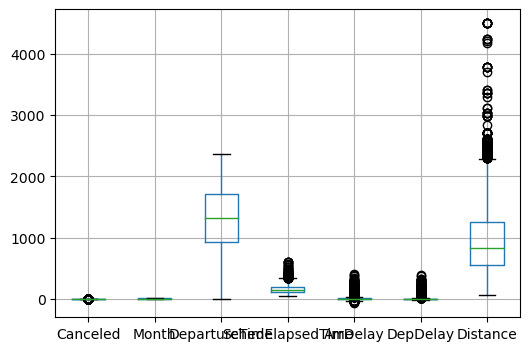

In [160]:
df.boxplot()
plt.show()

In [161]:
df.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,UA,134,0,0,679
1,1,12,830,DL,90,0,0,214
2,1,1,1835,UA,213,0,0,1605
3,1,4,1730,AA,80,0,0,235
4,1,7,1442,UA,103,0,0,413


# Univariant Graphs

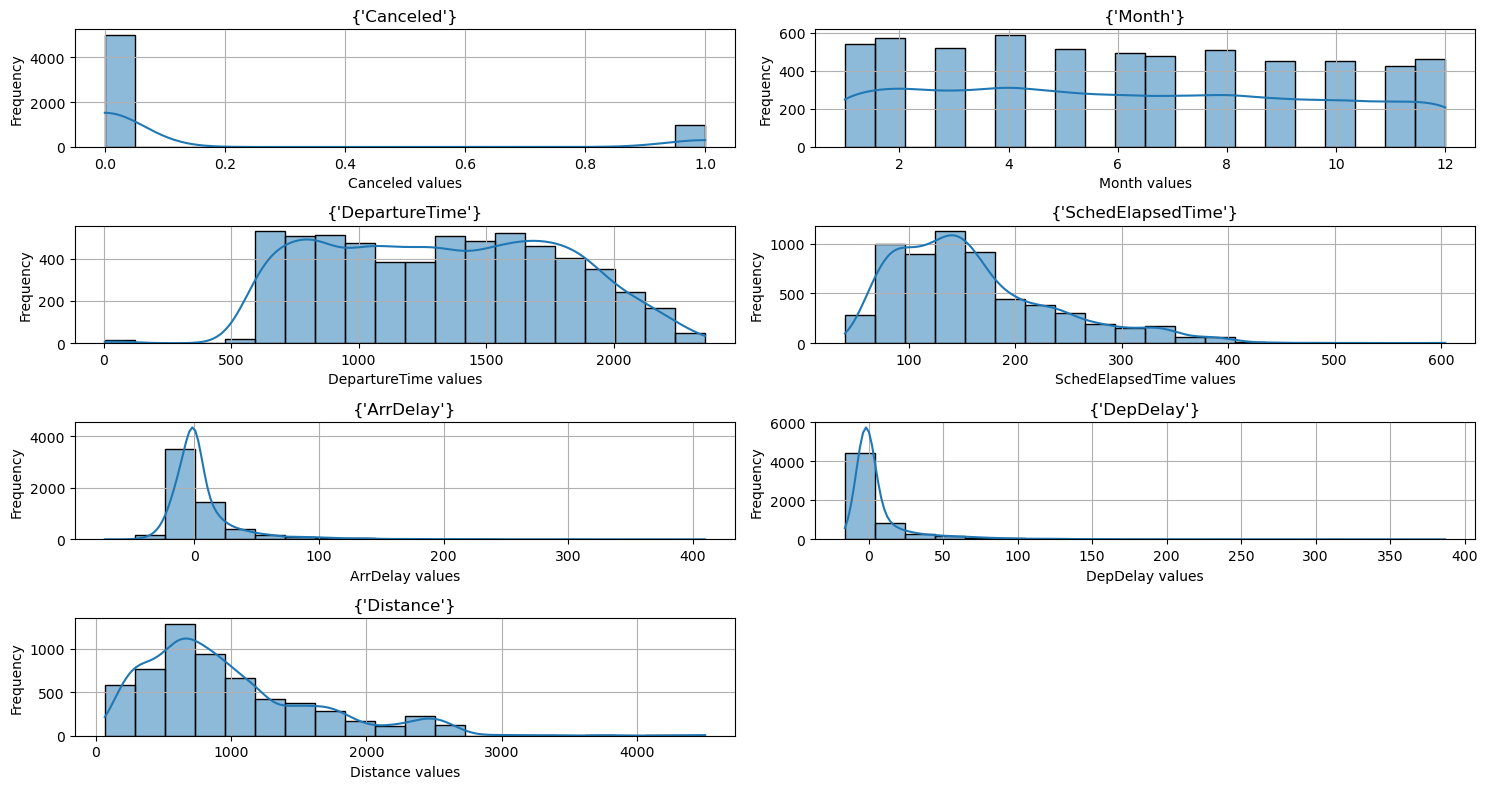

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the pandas DataFrame with numerical variables to visualize
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of columns needed for the subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Univariate histogram with KDE for all numerical variables
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title({column})
    axes[i].set_xlabel(f"{column} values")
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots
for j in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


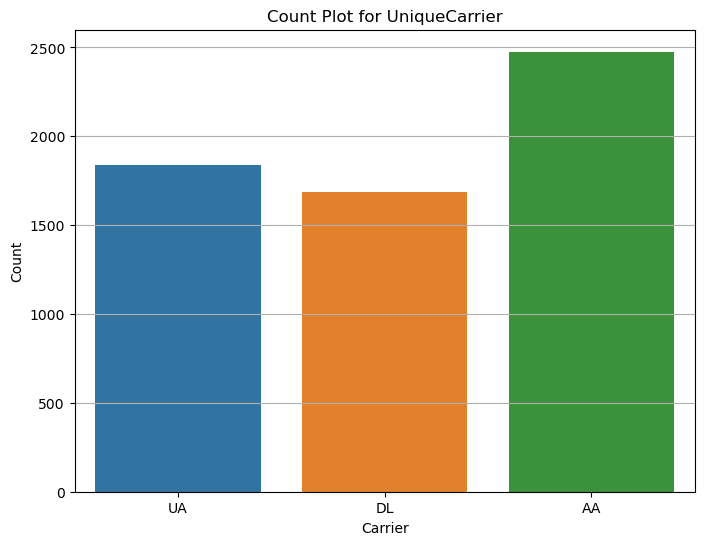

In [165]:
# Create count plot for 'UniqueCarrier'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='UniqueCarrier')
plt.title('Count Plot for UniqueCarrier')
plt.xlabel('Carrier')
plt.ylabel('Count')
plt.show()


# Bivariante Graphs

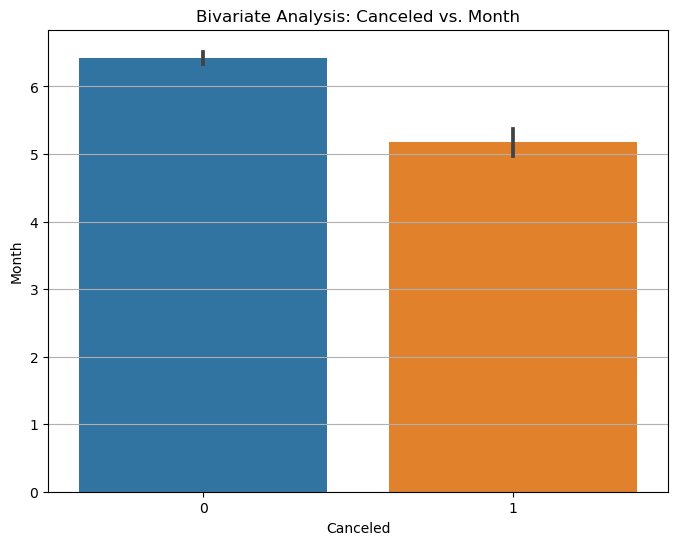

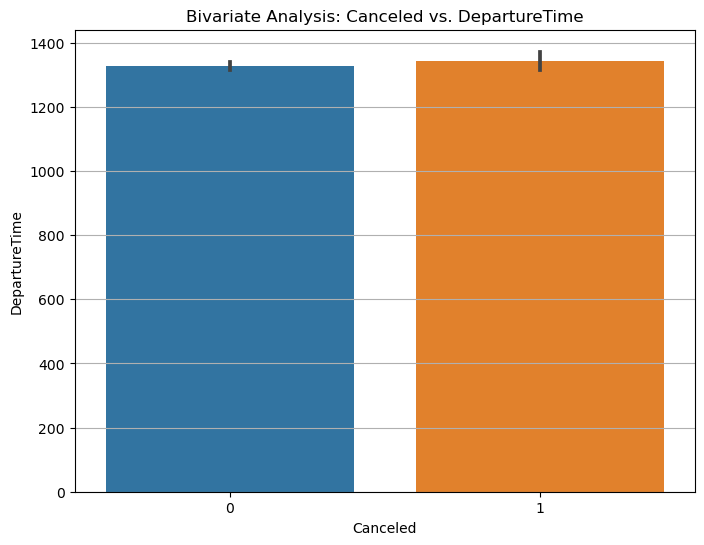

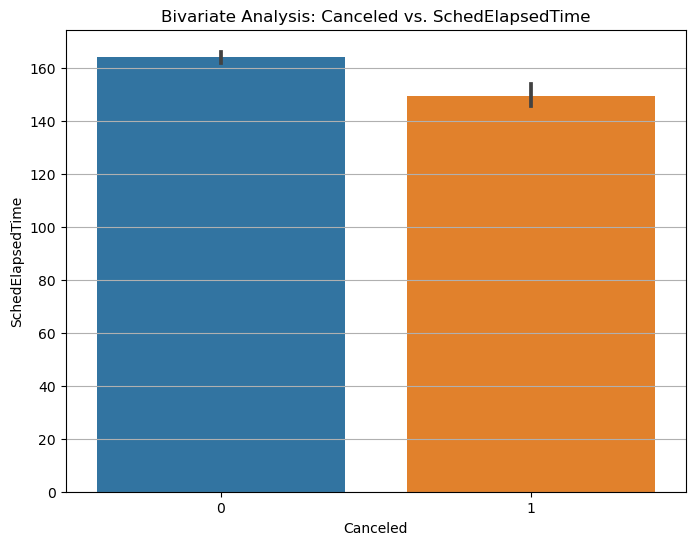

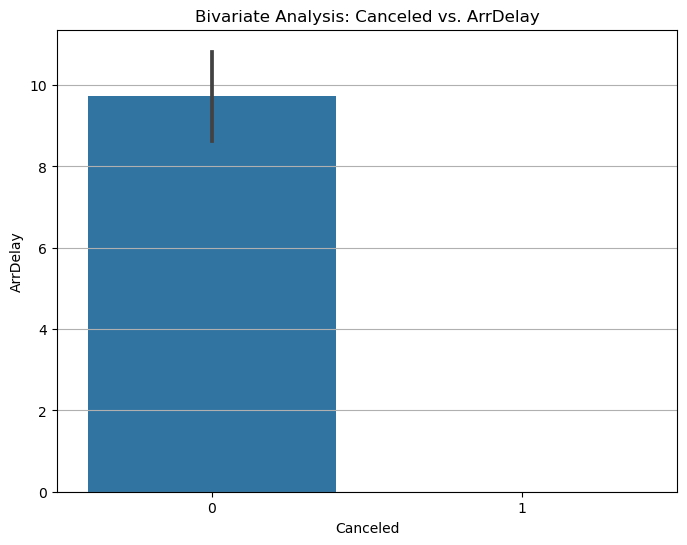

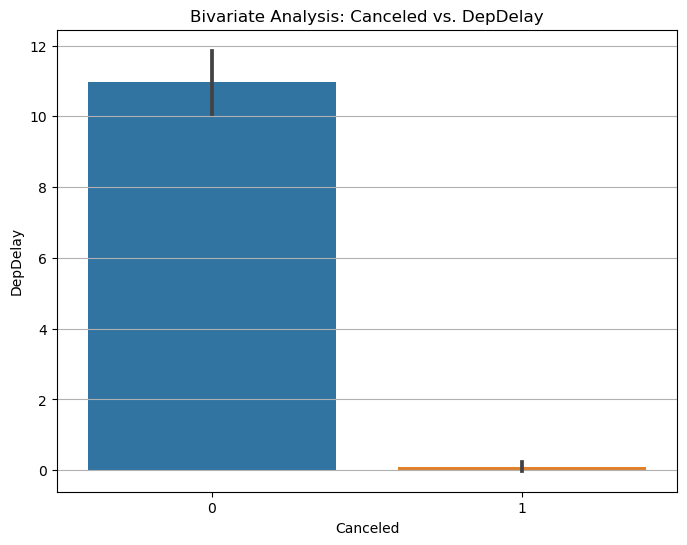

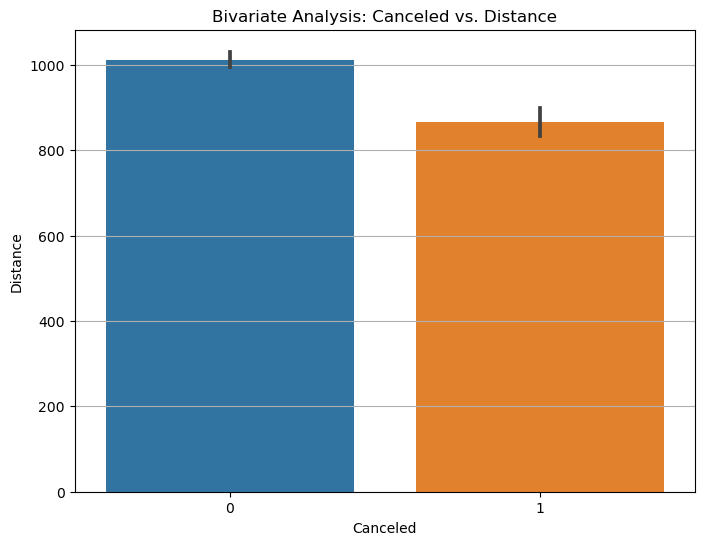

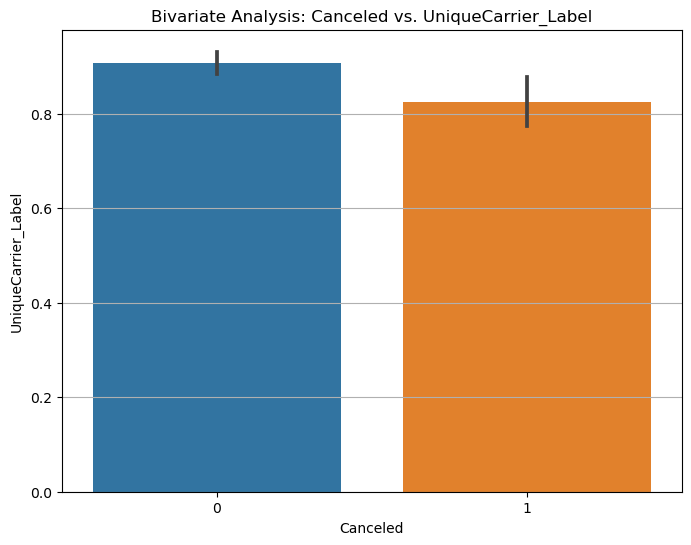

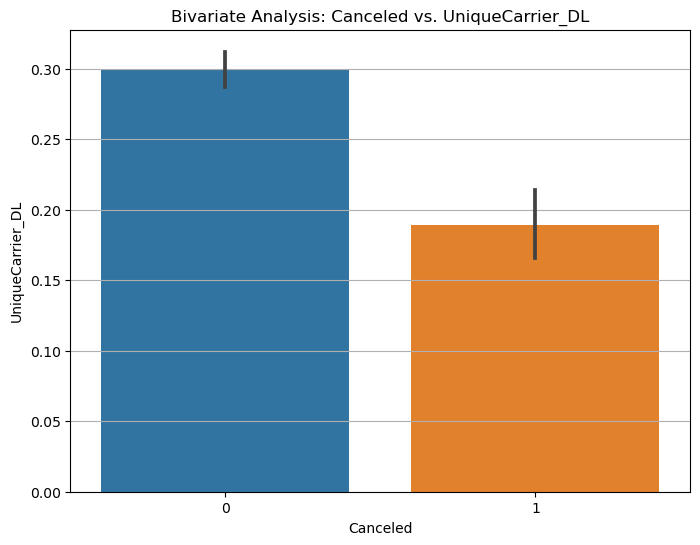

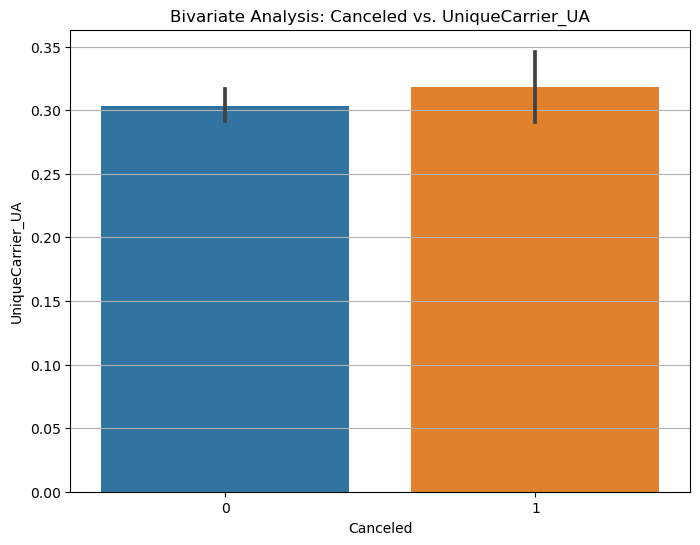

In [189]:


# Bivariate analysis using bar plots
for col in df.columns:
    if col != 'Canceled':
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Canceled', y=col, data=df)
        plt.title(f'Bivariate Analysis: Canceled vs. {col}')
        plt.xlabel('Canceled')
        plt.ylabel(col)
        plt.show()

# Corelation and ANOVA Test

In [173]:

numerical_cols = ['Month', 'DepartureTime', 'SchedElapsedTime', 'ArrDelay', 'DepDelay']
# Perform correlation test between each numerical column and 'Canceled'
for col in numerical_cols:
    correlation, p_value = stats.pointbiserialr(df['Canceled'], df[col])
    print(f"Correlation Test for {col}: correlation = {correlation}, p-value = {p_value}")

Correlation Test for Month: correlation = -0.1351213787477779, p-value = 7.564570854335376e-26
Correlation Test for DepartureTime: correlation = 0.012271877681404997, p-value = 0.3419022951978606
Correlation Test for SchedElapsedTime: correlation = -0.06944665174460148, p-value = 7.256745683166674e-08
Correlation Test for ArrDelay: correlation = -0.10146052421633701, p-value = 3.332050380249011e-15
Correlation Test for DepDelay: correlation = -0.12784897928688305, p-value = 2.7356450499460717e-23


In [176]:
from sklearn.preprocessing import LabelEncoder
# Encode the 'UniqueCarrier' column to numerical labels
label_encoder = LabelEncoder()
df['UniqueCarrier_Label'] = label_encoder.fit_transform(df['UniqueCarrier'])

# Perform ANOVA test for 'UniqueCarrier_Label' with 'Canceled'
grouped_data = [df[df['UniqueCarrier_Label'] == i]['Canceled'] for i in df['UniqueCarrier_Label'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"ANOVA Test for UniqueCarrier: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA Test for UniqueCarrier: F-statistic = 28.094481906711394, p-value = 7.170129477576311e-13


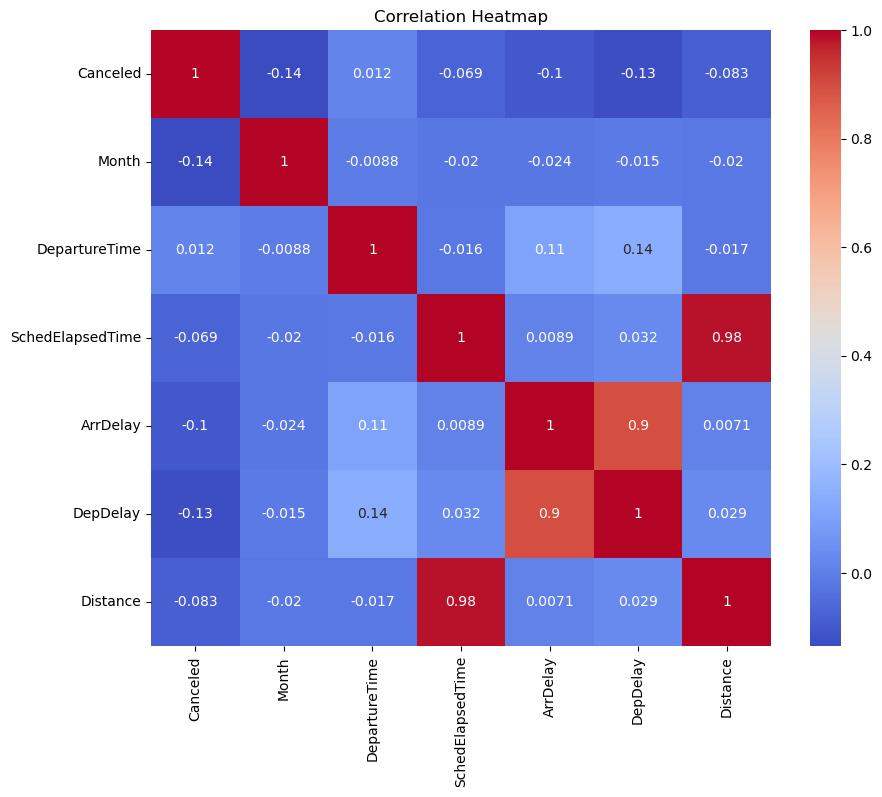

In [133]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [134]:

# Differentiate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Canceled', 'Month', 'DepartureTime', 'SchedElapsedTime', 'ArrDelay',
       'DepDelay', 'Distance'],
      dtype='object')
Categorical columns: Index(['UniqueCarrier'], dtype='object')


In [182]:
# Convert 'UniqueCarrier' column to numeric using one-hot encoding  
df = pd.get_dummies(df, columns=['UniqueCarrier'], drop_first=True)

# Model Building

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_column = 'Canceled'
categorical_columns = ['Month', 'DepartureTime', 'SchedElapsedTime', 'ArrDelay', 'UniqueCarrier_UA']  # List of column names to encode

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split data into features (X) and the target variable (y)
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]  # Reassign 'Hired' to the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000) # You can adjust max_iter based on your dataset size
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9716666666666667
Confusion Matrix:
[[956  29]
 [  5 210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       985
           1       0.88      0.98      0.93       215

    accuracy                           0.97      1200
   macro avg       0.94      0.97      0.95      1200
weighted avg       0.97      0.97      0.97      1200



# Predictions

In [184]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values for the first 20 samples
results_df = pd.DataFrame({'Predicted': y_pred[:20], 'Actual': y_test[:20].values})

# Display the results as a table
results_df

,Predicted,Actual
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1
